#Assignment 2 
#Predict median house price using Boston Housing Data from sklearn
#Jul 19, 2020
#Kim Tung

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns

In [2]:
boston = datasets.load_boston()
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target, columns = ["price"])

In [3]:
#crim-per capita crime rate by town
#zn- porportion of residential land zoned for lots over 25,000 sq. ft.
#indus -proportion of non-retail business per town
#chas - Charles River dummy variable (=1 if tract bounds river, 0 otherwise)
#nox - nitrogent oxide concentration (parts per 10 million)
#rm - average number of rooms per dwelling
#age - proportion of owner-occupied units built prior to 1940
#dis - weighted mean of distances to five Boston employment centres
#rad- index of accessibility of radial highways
#tax - full-value property tax rate per $10,000
#ptratio - pupil-teacher ratio by town
#b - 1000(bk-0.63)^2 where bk is the proportion of blacks by town
#lstate - % lower status of the population
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df_x.shape

(506, 13)

In [5]:
df_x.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [6]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
df_y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
minimum_price = np.min(df_y)
maximum_price = np.max(df_y)
mean_price = np.mean(df_y)
median_price = np.median(df_y)
std_price = np.std(df_y)
print("Statistics for Boston housing dataset:\n")
print("Minimum price: %0.2f" %(minimum_price))
print("Maximum price: %0.2f" %(maximum_price))
print("Medium price: %0.2f" %(median_price))
print("Mean price: %0.2f" %(mean_price))
print("Standard deviation of prices: %0.2f" %(std_price))

Statistics for Boston housing dataset:

Minimum price: 5.00
Maximum price: 50.00
Medium price: 21.20
Mean price: 22.53
Standard deviation of prices: 9.19


In [9]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
df_y.describe()

,price
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


13


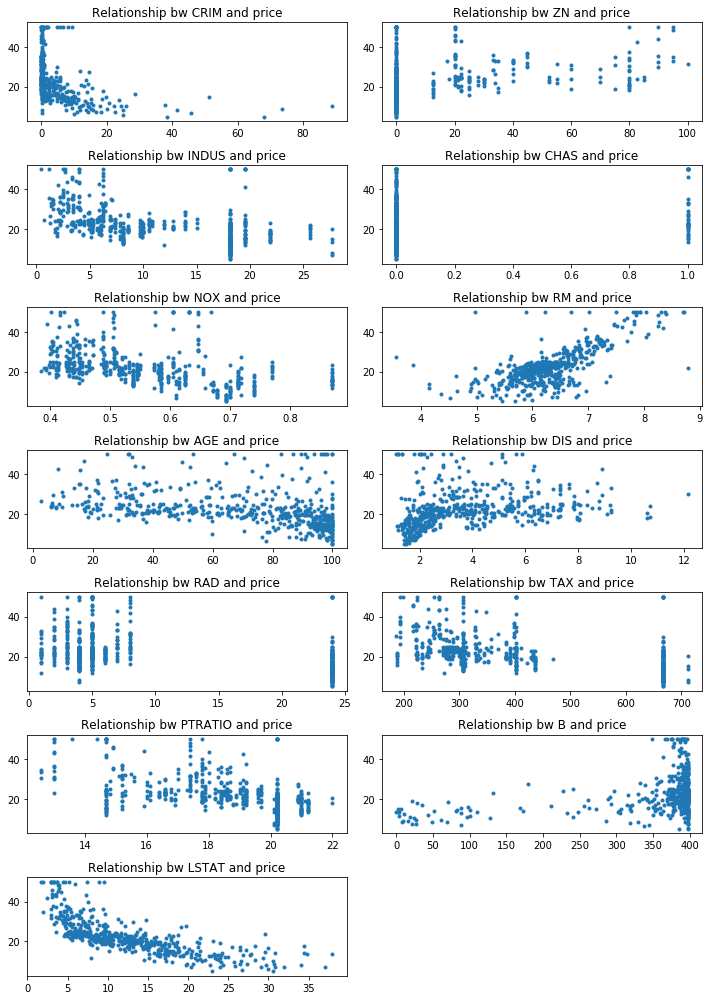

In [11]:
def plotFeature(col_list,title):
    plt.figure(figsize=(10,14))
    i=0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df_x[col],df_y,marker='.',linestyle='none')
        plt.title(title % (col))
        plt.tight_layout()
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
plotFeature(colnames, "Relationship bw %s and price")

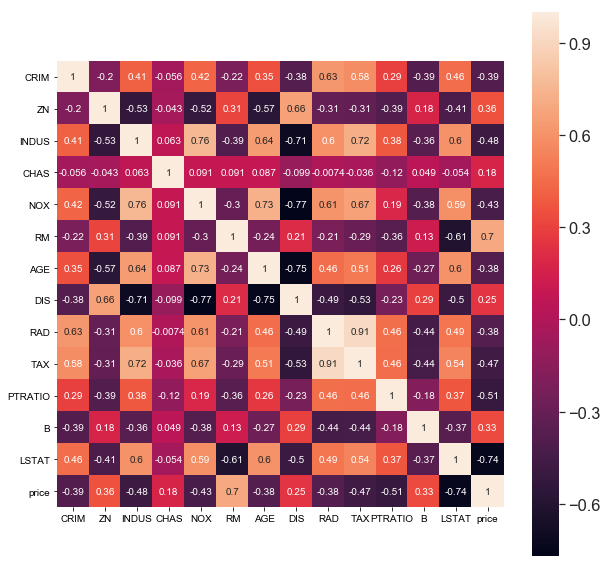

In [12]:
#We can see that RM(Avg. number of rooms per dwelling) has very linear relationship with price
#we can also find correlation between feature and price using heatmap
import seaborn as sns
df = pd.concat([df_x, df_y], axis=1, sort=True)
fig= plt.subplots(figsize=(10,10))
sns.set(font_scale =1.5)
sns.heatmap(df.corr(), square=True, cbar=True, annot=True, annot_kws={'size':10})
plt.show()

In [13]:
df_c=df.corr()
df_c

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [14]:
df_c["price_abs"]=abs(df_c["price"])

In [15]:
final_df=df_c.sort_values(by=['price_abs'], ascending=False)
final_df.drop(columns=["price_abs"])
final_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,price_abs
price,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.000000,1.000000
LSTAT,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000,-0.737663,0.737663
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.695360
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787,0.507787
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.483725
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.468536
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.427321
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.388305
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.381626
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.376955


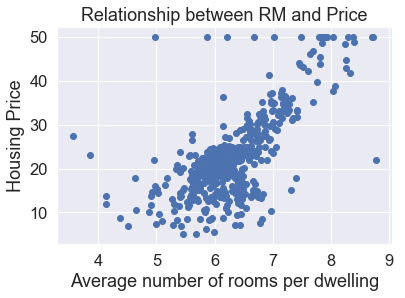

In [16]:
#Based on the correlation data, LSTAT, RM and PTRATIO has the highest correlation with price 
#Scatter plot between RM and housing price
plt.scatter(df_x.RM, df_y)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

In [17]:
#Create linear regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [18]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
37,0.08014,0.0,5.96,0.0,0.499,5.850,41.5,3.9342,5.0,279.0,19.2,396.90,8.77
286,0.01965,80.0,1.76,0.0,0.385,6.230,31.5,9.0892,1.0,241.0,18.2,341.60,12.93
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
25,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51


In [19]:
y_train.head()

,price
321,23.1
37,21.0
286,20.1
2,34.7
25,13.9


Text(0.5, 1.0, 'Prices vs Predicted prices: $Yi$ vs $\\hat{Y}i$')

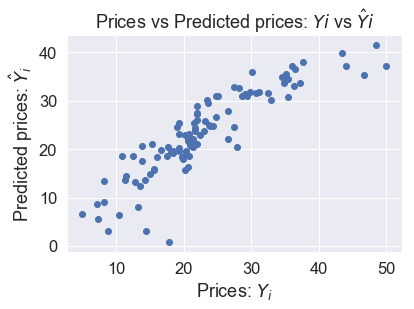

In [20]:
#plot of predicted and test
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_predict = linear_model.predict(X_test)
plt.scatter(y_test, y_predict)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Yi$ vs $\hat{Y}i$")

In [21]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
print(score)

0.7789207451814428


In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
print(mse)

18.495420122448312


In [23]:
#Best possible R2 is 1, therefore R2 of 0.77 is considered good.

In [41]:
y=df_y["price"].values.reshape(-1, 1)
y[1]


array([21.6])

In [61]:
y_predict = linear_model.predict(df_x)
print("Actual", y[0])
print("Predicted", y_predict[0])
print("Diff", y_predict[0]-y[0])
print("%Diff", ((y_predict[0]-y[0])/y[0])*100)

Actual [24.]
Predicted [30.62169482]
Diff [6.62169482]
%Diff [27.59039509]


In [47]:
y_predict

array([[30.62169482],
       [25.38194186],
       [30.79723661],
       [28.96612576],
       [28.27376296],
       [25.7500299 ],
       [23.52649475],
       [20.09948308],
       [11.84200487],
       [19.52805566],
       [19.49269776],
       [22.28741025],
       [21.0820992 ],
       [19.70869674],
       [19.48170453],
       [19.39905675],
       [20.41903209],
       [16.9529603 ],
       [15.75766967],
       [18.47112082],
       [12.50341936],
       [17.80155692],
       [15.79597922],
       [13.86563411],
       [15.81420496],
       [13.29598163],
       [15.62183187],
       [14.54609203],
       [19.69277608],
       [20.91920151],
       [11.32274928],
       [18.26898963],
       [ 8.04470074],
       [14.26024874],
       [13.30710491],
       [24.0411572 ],
       [22.42471213],
       [23.20086342],
       [22.8270719 ],
       [30.90511804],
       [33.71343923],
       [27.82692882],
       [25.11129326],
       [24.47958466],
       [23.0438057 ],
       [22

In [65]:
d = pd.DataFrame.from_dict({"Actual":y.reshape(1,len(y))[0],
                           "Predicted": (y_predict).reshape(1, len(y_predict))[0],
                           "Error":(y - y_predict).reshape(1, len(y-y_predict))[0],
                        "%Error":(((y - y_predict).reshape(1, len(y-y_predict))/y.reshape(1,len(y)))[0])*100})
d

,Actual,Predicted,Error,%Error
0,24.0,30.621695,-6.621695,-27.590395
1,21.6,25.381942,-3.781942,-17.508990
2,34.7,30.797237,3.902763,11.247157
3,33.4,28.966126,4.433874,13.275073
4,36.2,28.273763,7.926237,21.895682
5,28.7,25.750030,2.949970,10.278641
6,22.9,23.526495,-0.626495,-2.735785
7,27.1,20.099483,7.000517,25.832166
8,16.5,11.842005,4.657995,28.230274
9,18.9,19.528056,-0.628056,-3.323046


In [66]:
d.describe()

,Actual,Predicted,Error,%Error
count,506.000000,506.000000,506.000000,506.000000
mean,22.532806,22.610053,-0.077247,-3.430645
std,9.197104,8.052222,4.700286,25.012149
min,5.000000,-4.990843,-16.194677,-150.685726
25%,17.025000,17.610731,-2.847297,-15.661812
50%,21.200000,22.156743,-0.591811,-3.020074
75%,25.000000,27.522589,1.845367,8.469392
max,50.000000,44.802291,25.286610,171.297762
